In [1]:
# 集成算法：通过在数据上构建多个模型，集成所有模型的建模结果
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine.data.shape

(178, 13)

In [6]:
# 分训练集测试集
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size = 0.3)

In [7]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

In [8]:
print("single Tree:{}".format(score_c),
     "Random Forest:{}".format(score_r))

single Tree:0.7777777777777778 Random Forest:0.9814814814814815


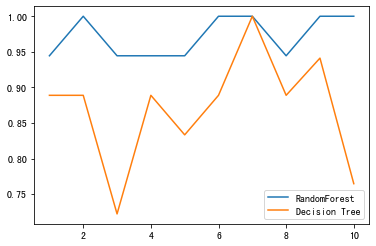

In [9]:
# 交叉验证
# 数据集划分为n份，每次取一份做测试集，n-1份做训练集，多次训练模型以观测模型稳定性的方法
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label='RandomForest')
plt.plot(range(1,11),clf_s,label='Decision Tree')
plt.legend()
plt.show()

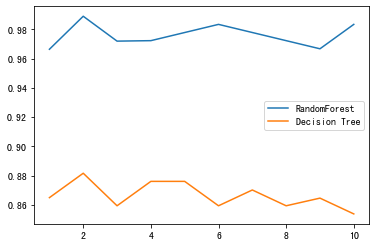

In [10]:
# 进行十次交叉验证
# 波动轨迹一致，集成算法
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label='RandomForest')
plt.plot(range(1,11),clf_l,label='Decision Tree')
plt.legend()
plt.show()

0.9888888888888889 26


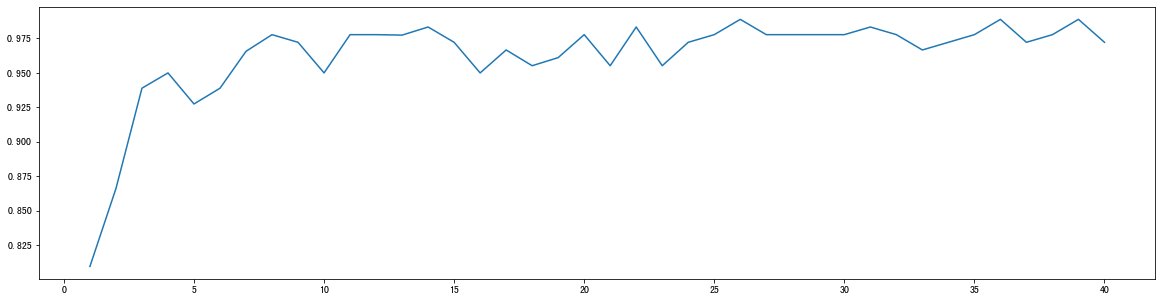

In [11]:
# n_estimator的学习曲线

superpa = []
for i in range(40):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,41),superpa)
plt.show()

In [12]:
rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)

In [13]:
# 随机森林的重要属性之一：estimators，查看森林中树的情况
rfc.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1872583848)

In [14]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


In [15]:
# 因为参数bootstrap的存在，无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data, wine.target)

In [16]:
rfc.oob_score_

0.9775280898876404

In [17]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)

0.9629629629629629

In [18]:
rfc.feature_importances_

array([0.10990386, 0.05905058, 0.00381145, 0.05124898, 0.01922767,
       0.0348891 , 0.17246138, 0.0149387 , 0.00491928, 0.12272109,
       0.07658988, 0.08629737, 0.24394067])

In [19]:
rfc.apply(Xtest)

array([[13, 12, 17, ..., 12, 13, 11],
       [11, 11,  2, ...,  2, 11,  4],
       [13, 12, 17, ...,  9,  8, 11],
       ...,
       [13, 12, 17, ..., 12,  8, 11],
       [ 6,  4, 16, ...,  6,  6,  8],
       [ 6,  4, 13, ...,  6,  6,  8]])

In [20]:
rfc.predict(Xtest)

array([0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 2, 1, 0, 1, 2, 0, 1, 1])

In [21]:
# 每一个样本被分到一类标签的概率
rfc.predict_proba(Xtest)

array([[0.92, 0.04, 0.04],
       [0.08, 0.08, 0.84],
       [0.96, 0.04, 0.  ],
       [0.8 , 0.16, 0.04],
       [0.44, 0.56, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.  , 0.04],
       [0.2 , 0.4 , 0.4 ],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.24, 0.76],
       [0.  , 0.12, 0.88],
       [0.96, 0.  , 0.04],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.16, 0.8 , 0.04],
       [0.2 , 0.04, 0.76],
       [0.36, 0.64, 0.  ],
       [0.96, 0.  , 0.04],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.12, 0.72, 0.16],
       [0.12, 0.6 , 0.28],
       [0.  , 0.96, 0.04],
       [0.68, 0.2 , 0.12],
       [0.  , 0.96, 0.04],
       [0.96, 0.04, 0.  ],
       [0.08, 0.84, 0.08],
       [0.08, 0.  , 0.92],
       [0.16, 0.72, 0.12],
       [0.96, 0.04, 0.  ],
       [0.  , 0.48, 0.52],
       [0.  , 0.  , 1.  ],
       [0.88, 0.04, 0.08],
 